In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("fashion_boutique_dataset.csv")
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [10]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [11]:
df[['original_price', 'current_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']].describe()

,original_price,current_price,markdown_percentage,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176.000000,1814.000000
mean,97.200340,85.499596,12.144715,24.937960,2.986604
std,51.637345,50.091354,18.417786,14.451387,1.159722
min,15.140000,7.290000,0.000000,0.000000,1.000000
25%,57.872500,46.845000,0.000000,13.000000,2.000000
50%,88.600000,74.885000,0.000000,25.000000,3.000000
75%,127.630000,112.865000,22.425000,37.000000,4.000000
max,249.980000,249.980000,59.900000,50.000000,5.000000


In [12]:
numeric_cols = ['original_price', 'current_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

original_price: 26 outliers
current_price: 48 outliers
markdown_percentage: 65 outliers
stock_quantity: 0 outliers
customer_rating: 0 outliers


In [13]:
df.isnull().sum()

,0
product_id,0
category,0
brand,0
season,0
size,491
color,0
original_price,0
markdown_percentage,0
current_price,0
purchase_date,0


In [14]:
df["category"].unique()

array(['Outerwear', 'Tops', 'Accessories', 'Shoes', 'Bottoms', 'Dresses'],
      dtype=object)

In [15]:
df.groupby("category")["size"].apply(lambda x: x.isna().sum())

,size
category,
Accessories,402
Bottoms,21
Dresses,17
Outerwear,12
Shoes,22
Tops,17


In [16]:
df['size']= df.apply(lambda row: row['size'] if (row['category']!="Accessories" and pd.isna(row['size'])) else "No Size", axis=1)

In [17]:
df['size']= df['size'].fillna("Unknown")

In [18]:
df['return_reason'].unique()

array([nan, 'Color Mismatch', 'Size Issue', 'Damaged', 'Quality Issue',
       'Changed Mind', 'Wrong Item'], dtype=object)

In [19]:
df["return_reason"] = df.apply(
    lambda row: "No_Return" if row["is_returned"] == 0 and pd.isna(row["return_reason"]) else row["return_reason"],
    axis=1
)

In [20]:
df["customer_rating"] = df.groupby(["category","brand"])["customer_rating"].transform(lambda x: x.fillna(x.median()))

In [22]:
df.duplicated().sum()

np.int64(0)

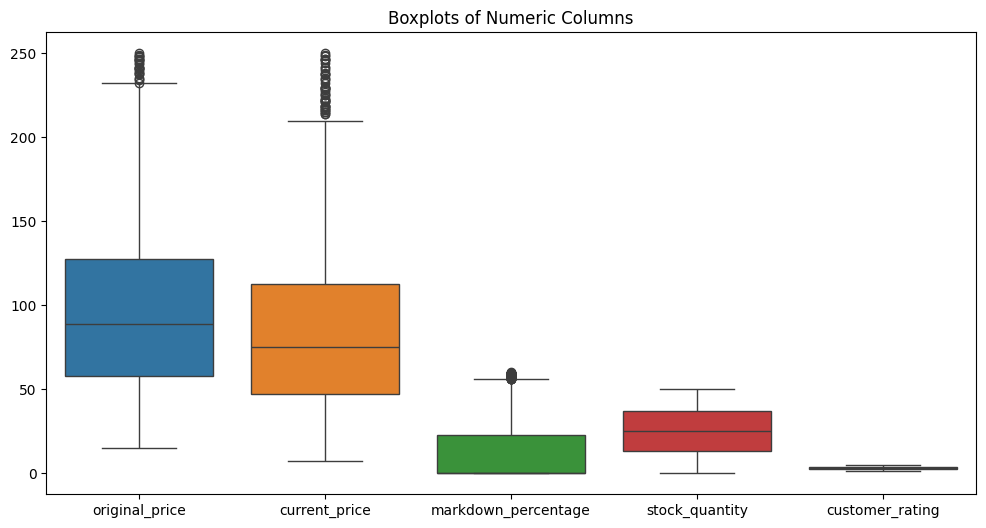

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['original_price', 'current_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Columns")
plt.show()

In [24]:
df[numeric_cols].corr()

,original_price,current_price,markdown_percentage,stock_quantity,customer_rating
original_price,1.000000,0.915059,-0.010938,-0.009425,0.004655
current_price,0.915059,1.000000,-0.368419,-0.008400,-0.000948
markdown_percentage,-0.010938,-0.368419,1.000000,0.012167,-0.000938
stock_quantity,-0.009425,-0.008400,0.012167,1.000000,-0.018438
customer_rating,0.004655,-0.000948,-0.000938,-0.018438,1.000000


In [25]:
df.drop('current_price',axis=1)

,product_id,category,brand,season,size,color,original_price,markdown_percentage,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,No Size,Red,196.01,0.0,2025-07-05,37,3.0,False,No_Return
1,FB000002,Tops,Uniqlo,Winter,No Size,Pink,119.64,0.0,2025-08-06,2,2.5,False,No_Return
2,FB000003,Accessories,Uniqlo,Winter,No Size,Black,33.80,0.0,2025-08-06,22,4.3,False,No_Return
3,FB000004,Shoes,Uniqlo,Spring,No Size,Black,75.36,0.0,2025-07-07,48,2.6,False,No_Return
4,FB000005,Tops,Banana Republic,Winter,No Size,Black,105.02,0.0,2025-08-06,10,2.8,False,No_Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,FB002172,Tops,Mango,Summer,No Size,Black,31.41,0.0,2025-08-06,10,2.1,False,No_Return
2172,FB002173,Dresses,Banana Republic,Winter,No Size,Brown,50.58,0.0,2025-08-06,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,No Size,Beige,79.37,54.8,2025-08-06,40,2.6,False,No_Return
2174,FB002175,Bottoms,Ann Taylor,Summer,No Size,Pink,105.52,0.0,2025-08-06,20,4.9,True,Size Issue


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           2176 non-null   object        
 1   category             2176 non-null   object        
 2   brand                2176 non-null   object        
 3   season               2176 non-null   object        
 4   size                 2176 non-null   object        
 5   color                2176 non-null   object        
 6   original_price       2176 non-null   float64       
 7   markdown_percentage  2176 non-null   float64       
 8   current_price        2176 non-null   float64       
 9   purchase_date        2176 non-null   datetime64[ns]
 10  stock_quantity       2176 non-null   int64         
 11  customer_rating      2176 non-null   float64       
 12  is_returned          2176 non-null   bool          
 13  return_reason        2176 non-nul

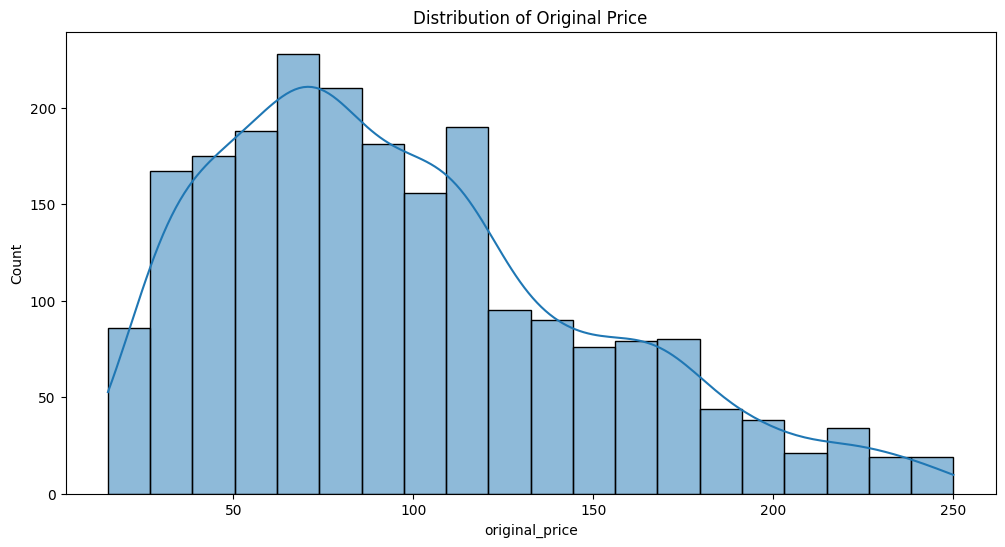

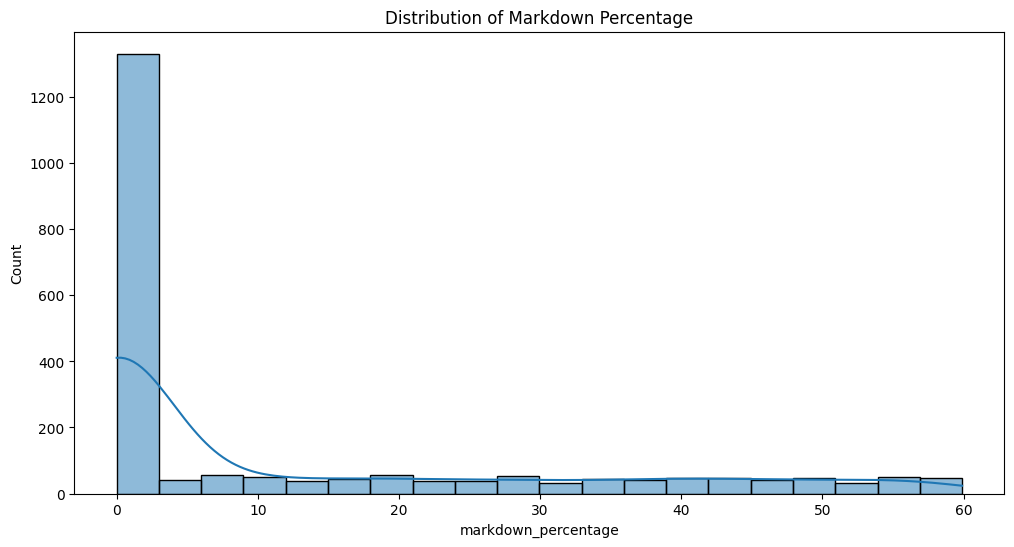

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='original_price', kde=True, bins=20)
plt.title("Distribution of Original Price")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='markdown_percentage', kde=True, bins=20)
plt.title("Distribution of Markdown Percentage")
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [29]:
target = 'original_price'

X = df.drop(columns=[target, 'product_id', 'purchase_date'])  # drop ID and date
y = df[target]

In [30]:
categorical_cols = ['category', 'brand', 'season', 'size', 'color', 'return_reason', 'is_returned']
numerical_cols = ['markdown_percentage', 'current_price', 'stock_quantity', 'customer_rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Encode categorical columns and scale numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [33]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}


In [34]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print(results_df)


              Model       RMSE        R2
5      RandomForest   2.454640  0.997472
6  GradientBoosting   2.537666  0.997298
4      DecisionTree   4.831947  0.990205
2             Lasso   8.954738  0.966360
1             Ridge   8.986578  0.966120
0  LinearRegression   8.989777  0.966096
3        ElasticNet   9.191320  0.964559
7               SVR  18.280902  0.859801


In [ ]:
# Random forest is the most accurate
